In [38]:
from datetime import datetime
import matplotlib.pyplot as plt

timestamps = [
    "2025-05-13 17:54:07.869",
    "2025-05-13 17:56:57.014",
    "2025-05-13 17:59:47.742",
    "2025-05-13 18:03:04.023",
    "2025-05-13 18:09:51.757",
    "2025-05-13 19:10:10.828"
]


frame_numbers = [213, 5003, 10003, 15003, 20003, 25003]

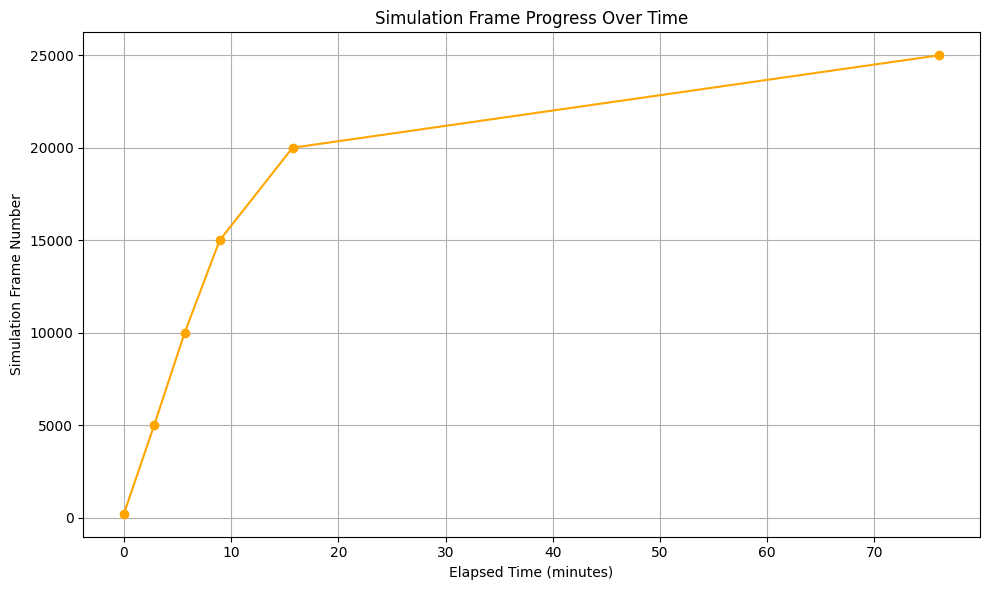

In [39]:
# Convert timestamps to datetime objects
datetime_objects = [datetime.strptime(
    ts, "%Y-%m-%d %H:%M:%S.%f") for ts in timestamps]

# Calculate elapsed time in minutes from the first timestamp
start_time = datetime_objects[0]
elapsed_minutes = [(t - start_time).total_seconds() /
                   60 for t in datetime_objects]

# Re-plot with correct frame numbers
plt.figure(figsize=(10, 6))
plt.plot(elapsed_minutes, frame_numbers, marker='o', color='orange')
plt.title("Simulation Frame Progress Over Time")
plt.xlabel("Elapsed Time (minutes)")
plt.ylabel("Simulation Frame Number")
plt.grid(True)
plt.tight_layout()
plt.show()

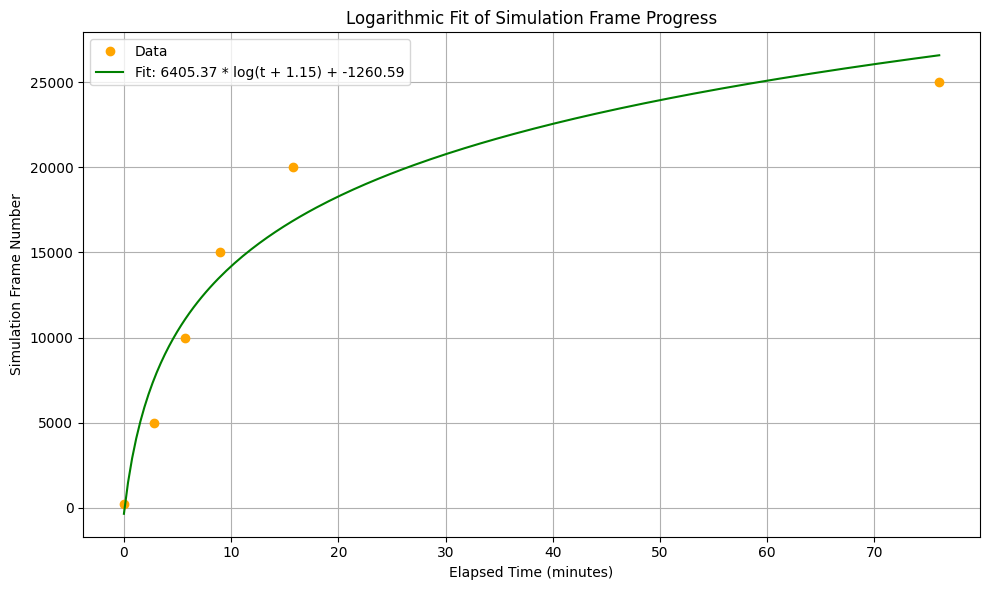

In [40]:
import numpy as np
from scipy.optimize import curve_fit

# Remove the last data point as requested
filtered_elapsed = elapsed_minutes
filtered_frames = frame_numbers

# Define a logarithmic function: f(t) = a * log(t + c) + b


def logarithmic(t, a, b, c):
    return a * np.log(t + c) + b


# Fit the curve
log_params, _ = curve_fit(logarithmic, filtered_elapsed,
                          filtered_frames, p0=(1000, 0, 1))

# Generate smooth data for plotting the fitted curve
t_fit = np.linspace(min(filtered_elapsed), max(filtered_elapsed), 200)
frames_log_fit = logarithmic(t_fit, *log_params)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_elapsed, filtered_frames, 'o', label='Data', color='orange')
plt.plot(t_fit, frames_log_fit, '-',
         label=f'Fit: {log_params[0]:.2f} * log(t + {log_params[2]:.2f}) + {log_params[1]:.2f}', color='green')
plt.title("Logarithmic Fit of Simulation Frame Progress")
plt.xlabel("Elapsed Time (minutes)")
plt.ylabel("Simulation Frame Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

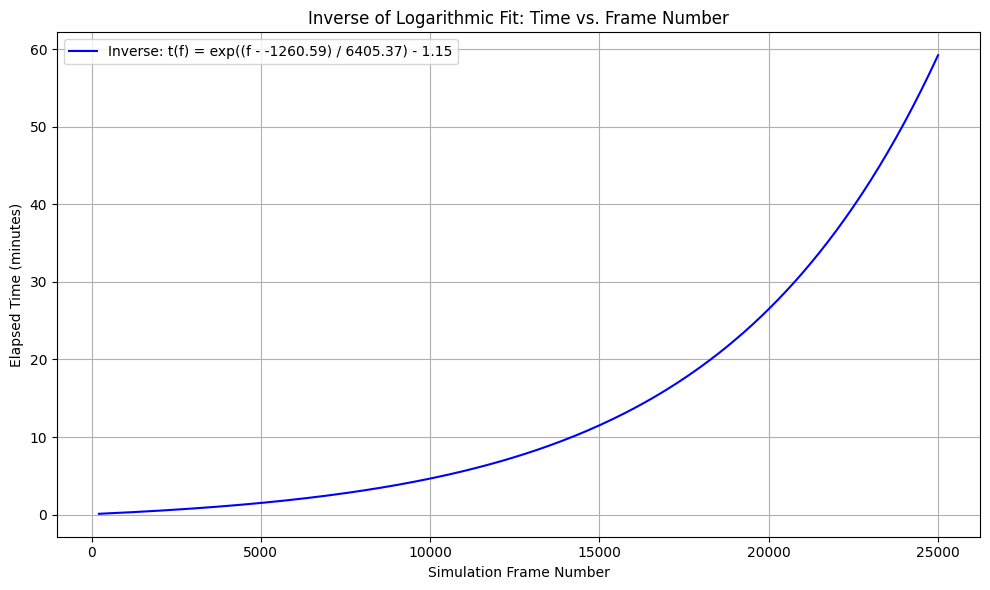

In [41]:

def inverse_logarithmic(f, a, b, c):
    return np.exp((f - b) / a) - c


# Generate frame values and compute corresponding times
frame_values = np.linspace(min(filtered_frames), max(filtered_frames), 200)
time_values = inverse_logarithmic(frame_values, *log_params)

# Plot the inverse function
plt.figure(figsize=(10, 6))
plt.plot(frame_values, time_values, '-',
         label=f'Inverse: t(f) = exp((f - {log_params[1]:.2f}) / {log_params[0]:.2f}) - {log_params[2]:.2f}', color='blue')
plt.title("Inverse of Logarithmic Fit: Time vs. Frame Number")
plt.xlabel("Simulation Frame Number")
plt.ylabel("Elapsed Time (minutes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()